In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
for p,d,f in os.walk('.'):
    print(f)

['data_check.ipynb', 'financials.csv', 'options.csv', 'secondary_stock_prices.csv', 'stock_prices.csv', 'timedelta.csv', 'trades.csv']
['data_check-checkpoint.ipynb']


In [3]:
f_list = ['financials.csv', 'options.csv', 'secondary_stock_prices.csv', 'stock_prices.csv', 'trades.csv']

In [4]:
#各ファイルの内容をデータフレームに格納
df_dict = {}
for f in f_list:
    tmp = pd.read_csv(f)
    df_dict[f[:-4]] =  tmp

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df_sp = df_dict['stock_prices']
df_fi = df_dict['financials']
df_op = df_dict['options']
df_sp2 = df_dict['secondary_stock_prices']
df_tr = df_dict['trades']

In [6]:
#各証券の始値、終値、取引量、シャープ値の時系列データ
df_sp.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154


In [8]:
#各会社の４半期ごとの決算情報→売上・利益・シェア・配当の予測情報が有効な特徴量になりそう
df_fi.head(3)

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
1,2.017010e+13,20170104_3353,2017-01-04,3353.0,2017-01-04,15:00:00,1.483510e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,485.36,NaN,False,True,False,False,False,2035000.0,118917,1916083.0
2,2.016123e+13,20170104_4575,2017-01-04,4575.0,2017-01-04,12:00:00,1.483499e+09,ForecastRevision,2016-12-31,2Q,...,-93.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
sample = df_fi[df_fi['SecuritiesCode']==2753.0]

In [10]:
sample.head(10)

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
4584,2.017031e+13,20170403_2753,2017-04-03,2753.0,2017-04-03,07:30:00,1.491172e+09,FYFinancialStatements_Consolidated_JP,2017-03-31,FY,...,316.84,NaN,False,True,False,False,False,6848800.0,－,6848800.0
9443,2.017061e+13,20170703_2753,2017-07-03,2753.0,2017-07-03,07:30:00,1.499035e+09,1QFinancialStatements_Consolidated_JP,2017-06-30,1Q,...,316.84,NaN,False,False,False,False,False,6848800.0,－,6848800.0
13723,2.017091e+13,20171002_2753,2017-10-02,2753.0,2017-10-02,07:30:00,1.506897e+09,2QFinancialStatements_Consolidated_JP,2017-09-30,2Q,...,316.84,NaN,False,False,False,False,False,6848800.0,－,6848800.0
18581,2.017121e+13,20180104_2753,2018-01-04,2753.0,2018-01-04,07:30:00,1.515019e+09,3QFinancialStatements_Consolidated_JP,2017-12-31,3Q,...,316.84,NaN,False,False,False,False,False,6848800,151,6848649
23159,2.018031e+13,20180402_2753,2018-04-02,2753.0,2018-04-02,07:30:00,1.522622e+09,FYFinancialStatements_Consolidated_JP,2018-03-31,FY,...,306.63,NaN,False,False,False,False,False,6848800,185,6848644
27861,2.018052e+13,20180702_2753,2018-07-02,2753.0,2018-07-02,07:30:00,1.530484e+09,1QFinancialStatements_Consolidated_JP,2018-06-30,1Q,...,306.63,NaN,False,False,False,False,False,6848800,224,6848576
32074,2.018091e+13,20181001_2753,2018-10-01,2753.0,2018-10-01,18:00:00,1.538384e+09,2QFinancialStatements_Consolidated_JP,2018-09-30,2Q,...,306.63,NaN,False,False,False,False,False,6848800,224,6848576
36719,2.018121e+13,20190107_2753,2019-01-07,2753.0,2019-01-07,07:30:00,1.546814e+09,3QFinancialStatements_Consolidated_JP,2018-12-31,3Q,...,306.63,NaN,False,False,False,False,False,6848800.0,324,6848536.0
40981,2.019032e+13,20190315_2753,2019-03-15,2753.0,2019-03-15,15:00:00,1.552630e+09,ForecastRevision,2019-03-31,FY,...,224.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_op.head(50)

,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
0,20170104_132010018,2017-01-04,132010018,650.0,650.0,480.0,480.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,480.0,478.4587,17.4736,17.5865,0.0091,0.0,0.0
1,20170104_132010118,2017-01-04,132010118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,575.0,571.1385,17.4736,16.5000,0.0091,0.0,0.0
2,20170104_132010218,2017-01-04,132010218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,680.0,677.3710,17.4736,15.8644,0.0091,0.0,0.0
3,20170104_132010318,2017-01-04,132010318,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,795.0,791.0383,17.4736,15.2288,0.0091,0.0,0.0
4,20170104_132010518,2017-01-04,132010518,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,910.0,909.9947,17.4736,14.5932,0.0091,0.0,0.0
5,20170104_132010618,2017-01-04,132010618,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,1050.0,1042.7369,17.4736,19.4887,0.0091,0.0,0.0
6,20170104_132010718,2017-01-04,132010718,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,1170.0,1165.7104,17.4736,20.5711,0.0091,0.0,0.0
7,20170104_132010818,2017-01-04,132010818,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,1290.0,1286.4746,17.4736,20.3028,0.0091,0.0,0.0
8,20170104_132011018,2017-01-04,132011018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,1410.0,1407.3099,17.4736,18.2771,0.0091,0.0,0.0
9,20170104_132011118,2017-01-04,132011118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,1540.0,1532.3352,17.4736,19.6807,0.0091,0.0,0.0


In [12]:
df_tr.head(30)

,Date,StartDate,EndDate,Section,TotalSales,TotalPurchases,TotalTotal,TotalBalance,ProprietarySales,ProprietaryPurchases,...,CityBKsRegionalBKsEtcTotal,CityBKsRegionalBKsEtcBalance,TrustBanksSales,TrustBanksPurchases,TrustBanksTotal,TrustBanksBalance,OtherFinancialInstitutionsSales,OtherFinancialInstitutionsPurchases,OtherFinancialInstitutionsTotal,OtherFinancialInstitutionsBalance
0,2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-01-13,2017-01-04,2017-01-06,Growth Market (Mothers/JASDAQ),4.592074e+08,4.593263e+08,9.185338e+08,118862.0,1.605747e+07,1.282267e+07,...,99878.0,-22676.0,4758211.0,5797986.0,10556197.0,1039775.0,21362.0,110809.0,132171.0,89447.0
7,2017-01-13,2017-01-04,2017-01-06,Prime Market (First Section),8.476800e+09,8.483346e+09,1.696015e+10,6546353.0,1.311271e+09,1.453327e+09,...,19450660.0,-1762918.0,292932297.0,245322795.0,538255092.0,-47609502.0,22410692.0,21764485.0,44175177.0,-646207.0
8,2017-01-13,2017-01-04,2017-01-06,Standard Market (Second Section),2.223549e+08,2.217707e+08,4.441256e+08,-584153.0,1.309361e+07,6.535935e+06,...,39167.0,-34565.0,1328241.0,1807118.0,3135359.0,478877.0,48202.0,36455.0,84657.0,-11747.0
9,2017-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_op.head(20)

,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
0,20170104_132010018,2017-01-04,132010018,650.0,650.0,480.0,480.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,480.0,478.4587,17.4736,17.5865,0.0091,0.0,0.0
1,20170104_132010118,2017-01-04,132010118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,575.0,571.1385,17.4736,16.5000,0.0091,0.0,0.0
2,20170104_132010218,2017-01-04,132010218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,680.0,677.3710,17.4736,15.8644,0.0091,0.0,0.0
3,20170104_132010318,2017-01-04,132010318,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,795.0,791.0383,17.4736,15.2288,0.0091,0.0,0.0
4,20170104_132010518,2017-01-04,132010518,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,910.0,909.9947,17.4736,14.5932,0.0091,0.0,0.0
5,20170104_132010618,2017-01-04,132010618,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,1050.0,1042.7369,17.4736,19.4887,0.0091,0.0,0.0
6,20170104_132010718,2017-01-04,132010718,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,1170.0,1165.7104,17.4736,20.5711,0.0091,0.0,0.0
7,20170104_132010818,2017-01-04,132010818,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,1290.0,1286.4746,17.4736,20.3028,0.0091,0.0,0.0
8,20170104_132011018,2017-01-04,132011018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,1410.0,1407.3099,17.4736,18.2771,0.0091,0.0,0.0
9,20170104_132011118,2017-01-04,132011118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,1540.0,1532.3352,17.4736,19.6807,0.0091,0.0,0.0


In [16]:
len(df_op['OptionsCode'].unique())

14732

In [23]:
code = str(df_op['OptionsCode'][1])
code[-4:-2]

'01'

In [13]:
#日経OPを抜粋
nk_list = []
for i in df_op['OptionsCode']:
    if str(i)[-4:-2] == '82':
        nk_list.append(True)
    else:
        nk_list.append(False)

In [16]:
df_op[nk_list].head(20)

,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
55,20170104_132018218,2017-01-04,132018218,70.0,80.0,13.0,13.0,70.0000,80.0000,70.0000,...,1,20170112,20170113,13.0,13.0001,17.4736,26.0862,0.0091,0.0000,0.0
120,20170104_132028218,2017-01-04,132028218,230.0,240.0,115.0,115.0,230.0000,240.0000,225.0000,...,1,20170209,20170210,115.0,115.0004,17.4736,22.5223,0.0300,0.0752,0.0
179,20170104_132038218,2017-01-04,132038218,275.0,275.0,240.0,240.0,0.0000,0.0000,0.0000,...,1,20170309,20170310,245.0,240.1053,17.4736,22.5663,0.0464,0.3869,0.0
226,20170104_132048218,2017-01-04,132048218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170413,20170414,400.0,398.8054,17.4736,22.1428,0.0573,2.7314,0.0
266,20170104_132058218,2017-01-04,132058218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170511,20170512,500.0,498.4466,17.4736,22.1693,0.1064,2.1339,0.0
306,20170104_132068218,2017-01-04,132068218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170608,20170609,600.0,596.7899,17.4736,22.3261,0.1064,1.7509,0.0
346,20170104_132078218,2017-01-04,132078218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170713,20170714,720.0,716.7895,17.4736,22.4554,0.1064,1.6604,0.0
386,20170104_132088218,2017-01-04,132088218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170809,20170810,800.0,797.6095,17.4736,22.5379,0.1282,1.4655,0.0
426,20170104_132098218,2017-01-04,132098218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170907,20170908,885.0,883.1763,17.4736,22.5971,0.1282,1.3839,0.0
466,20170104_132128218,2017-01-04,132128218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20171207,20171208,1150.0,1141.6221,17.4736,22.5187,0.1282,1.6769,0.0


In [34]:
date = df_op[nk_list]['Date'] 
nk = df_op[nk_list]['SettlementPrice']

In [48]:
date_list = []
for date in df_op[nk_list]['DateCode']:
    date = int(date[0:8])
    date_list.append(date)

In [49]:
date_list

[20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170104,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170105,
 20170106,
 20170106,
 20170106,
 20170106,
 20170106,
 20170106,
 20170106,
 20170106,
 20170106,
 20170106,
 20170106,
 20170106,
 20170106,
 20170106,
 20170106,

In [50]:
df_op_nk = df_op[nk_list]

In [51]:
df_op_nk['Date1'] = date_list

<ipython-input-51-667c62b11397>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op_nk['Date1'] = date_list


In [54]:
df_op_nk['Expiration'] =  df_op_nk['LastTradingDay']-df_op_nk['Date1']

<ipython-input-54-c76bc08a828c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op_nk['Expiration'] =  df_op_nk['LastTradingDay']-df_op_nk['Date1']


In [60]:
df_op_nk['Date']

55         2017-01-04
120        2017-01-04
179        2017-01-04
226        2017-01-04
266        2017-01-04
              ...    
3567448    2021-12-03
3567546    2021-12-03
3567586    2021-12-03
3567637    2021-12-03
3567677    2021-12-03
Name: Date, Length: 79526, dtype: object

In [98]:
sample = df_op_nk['Date'][55]
sample

str

In [97]:
df_op_nk['Date']

55         2017-01-04
120        2017-01-04
179        2017-01-04
226        2017-01-04
266        2017-01-04
              ...    
3567448    2021-12-03
3567546    2021-12-03
3567586    2021-12-03
3567637    2021-12-03
3567677    2021-12-03
Name: Date, Length: 79526, dtype: object

In [101]:
df_op_nk['Date2'] = df_op_nk['Date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d')) 

<ipython-input-101-b9fa7cdd127e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op_nk['Date2'] = df_op_nk['Date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))


In [102]:
df_op_nk['Date2']

55        2017-01-04
120       2017-01-04
179       2017-01-04
226       2017-01-04
266       2017-01-04
             ...    
3567448   2021-12-03
3567546   2021-12-03
3567586   2021-12-03
3567637   2021-12-03
3567677   2021-12-03
Name: Date2, Length: 79526, dtype: datetime64[ns]

In [69]:
date = datetime.datetime.strptime(sample,'%Y-%m-%d')
date

datetime.datetime(2017, 1, 4, 0, 0)

In [76]:
sample2 = str(df_op_nk['LastTradingDay'][55])
sample2

'20170112'

In [82]:
date2 = pd.to_datetime(sample2)

In [83]:
date2

Timestamp('2017-01-12 00:00:00')

In [90]:
date2.date()

datetime.date(2017, 1, 12)

In [91]:
date.date()

datetime.date(2017, 1, 4)

In [94]:
delta = date2.date() - date.date()
delta.total_seconds()

691200.0

In [103]:
df_op_nk['Date3'] = df_op_nk['LastTradingDay'].apply(lambda x: pd.to_datetime(str(x)))

<ipython-input-103-4f7ca00402e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op_nk['Date3'] = df_op_nk['LastTradingDay'].apply(lambda x: pd.to_datetime(str(x)))


In [105]:
#日付データ処理まとめ
#→API上はdate型になっているので、本前処理は不要

#①文字列型(---or///区切り)の場合
#datetime.datetime.strptime()で文字列情報からdatetime形に変換
#※p：parse　構文解析の意味

#②int型の場合
#文字列に変換→pd.to_datetimeを利用してTimestamp型に変換
df_op_nk['Date2'] = df_op_nk['Date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d')) 
df_op_nk['Date3'] = df_op_nk['LastTradingDay'].apply(lambda x: pd.to_datetime(str(x)))
df_op_nk['Timedelta'] = df_op_nk['Date3'] - df_op_nk['Date2']
df_op_nk['Timedelta'] = df_op_nk['Timedelta'].apply(lambda x: x.total_seconds())

<ipython-input-105-a01ee32d7c58>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op_nk['Date2'] = df_op_nk['Date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
<ipython-input-105-a01ee32d7c58>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op_nk['Date3'] = df_op_nk['LastTradingDay'].apply(lambda x: pd.to_datetime(str(x)))
<ipython-input-105-a01ee32d7c58>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [106]:
df_op_nk['Timedelta']

55           691200.0
120         3110400.0
179         5529600.0
226         8553600.0
266        10972800.0
              ...    
3567448    31968000.0
3567546    47692800.0
3567586    63417600.0
3567637    79747200.0
3567677    95472000.0
Name: Timedelta, Length: 79526, dtype: float64

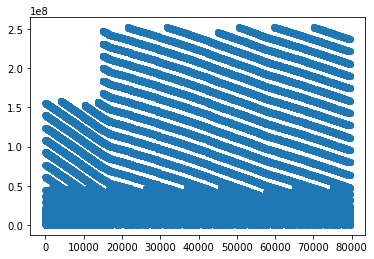

In [112]:
x = np.arange(len(df_op_nk['Timedelta']))
y = df_op_nk['Timedelta']
plt.scatter(x,y)

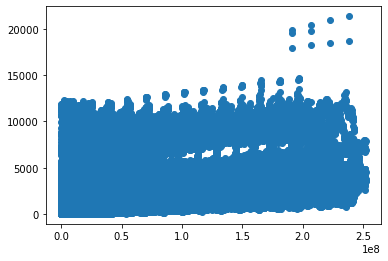

In [113]:
z = df_op_nk['SettlementPrice']
plt.scatter(y,z)

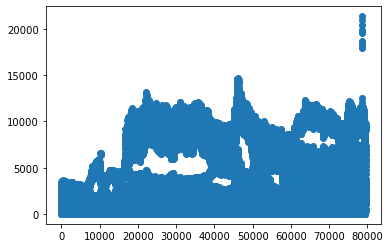

In [117]:
plt.scatter(x,z)

In [119]:
#Timedelta、Priceの正規化
def standard(mi,ma,inpu):
    std = (inpu - mi)/(ma-mi)
    return std

In [125]:
abc=df_op_nk
df_op_nk['TimeStd'] = df_op_nk['Timedelta'].apply(lambda x: standard(abc['Timedelta'].min(),abc['Timedelta'].max(),x))
df_op_nk['PriceStd'] = df_op_nk['SettlementPrice'].apply(lambda x: standard(abc['SettlementPrice'].min(),abc['SettlementPrice'].max(),x))
df_op_nk['Ratio'] = df_op_nk['PriceStd']/df_op_nk['TimeStd'] 

<ipython-input-125-c77803e48a91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op_nk['TimeStd'] = df_op_nk['Timedelta'].apply(lambda x: standard(abc['Timedelta'].min(),abc['Timedelta'].max(),x))
<ipython-input-125-c77803e48a91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op_nk['PriceStd'] = df_op_nk['SettlementPrice'].apply(lambda x: standard(abc['SettlementPrice'].min(),abc['SettlementPrice'].max(),x))
<ipython-input-125-c77803e48a91>:4: SettingWithCopyWarning: 
A value is trying to be set on

In [123]:
df_op_nk[['TimeStd','PriceStd']]

,TimeStd,PriceStd
55,0.002742,0.000561
120,0.012337,0.005334
179,0.021933,0.011416
226,0.033927,0.018668
266,0.043523,0.023346
...,...,...
3567448,0.126799,0.089080
3567546,0.189171,0.102648
3567586,0.251542,0.114812
3567637,0.316313,0.124170


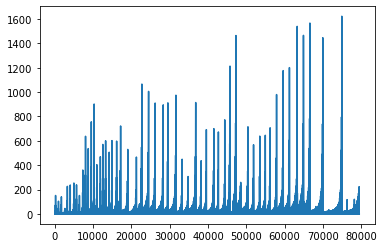

In [126]:
plt.plot(x,df_op_nk['Ratio'])

In [118]:
df_csv = df_op_nk[['Timedelta','SettlementPrice']]

In [116]:
df_csv.to_csv('timedelta.csv')